🔍 Let's estimate your weight loss journey!

⚠️ Please enter a valid number.
⚠️ Please enter a valid number.
⚠️ Please enter a valid number.
⚠️ Please enter a valid number.
38.58024691358025
2160.0
1310.0

📊 BMI: 38.6
🔥 BMR: 2160 kcal/day
📉 Estimated time to lose 20.0 kg: 117 days


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_33504\503560514.py:70: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


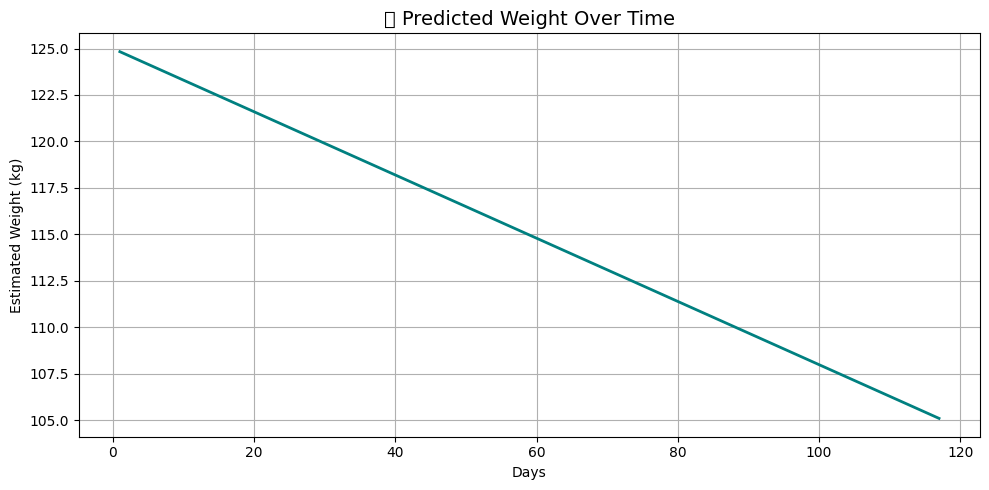

In [4]:
import matplotlib.pyplot as plt

# --- Input with validation ---
def get_float(prompt):
    while True:
        try:
            val = float(input(prompt))
            if val <= 0:
                print("⚠️ Value must be greater than zero.")
                continue
            return val
        except ValueError:
            print("⚠️ Please enter a valid number.")

def get_sex():
    while True:
        sex = input("Enter your biological sex (M/F): ").strip().upper()
        if sex in ['M', 'F']:
            return sex
        print("⚠️ Please enter 'M' for male or 'F' for female.")

# --- Collecting Inputs ---
print("🔍 Let's estimate your weight loss journey!\n")
age = get_float("Enter your age (years): ")
sex = get_sex()
weight = get_float("Enter your current weight (kg): ")
height_cm = get_float("Enter your height (cm): ")
calorie_intake = get_float("Enter your daily calorie intake (kcal): ")
calorie_expenditure = get_float("Enter your total daily calorie expenditure (kcal): ")
target_kg = get_float("How many kilograms would you like to lose? ")

# --- Calculations ---
height_m = height_cm / 100
bmi = weight / (height_m ** 2)

print(bmi)

if sex == 'M':
    bmr = 10 * weight + 6.25 * height_cm - 5 * age + 5
else:
    bmr = 10 * weight + 6.25 * height_cm - 5 * age - 161

print(bmr)
deficit = (calorie_expenditure + bmr) - calorie_intake

print(deficit)
if deficit <= 0:
    print("\n⚠️ You're not in a calorie deficit—adjust your intake or activity to lose weight.")
    exit()

total_calories_needed = target_kg * 7700
estimated_days = int(total_calories_needed / deficit)

# --- Output ---
print(f"\n📊 BMI: {bmi:.1f}")
print(f"🔥 BMR: {bmr:.0f} kcal/day")
print(f"📉 Estimated time to lose {target_kg} kg: {estimated_days} days")

# --- Plot ---
days = list(range(1, estimated_days + 1))
weight_loss_per_day = deficit / 7700
weights = [weight - weight_loss_per_day * d for d in days]

plt.figure(figsize=(10, 5))
plt.plot(days, weights, color='teal', linewidth=2)
plt.title("🏃 Predicted Weight Over Time", fontsize=14)
plt.xlabel("Days")
plt.ylabel("Estimated Weight (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_33504\226964049.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


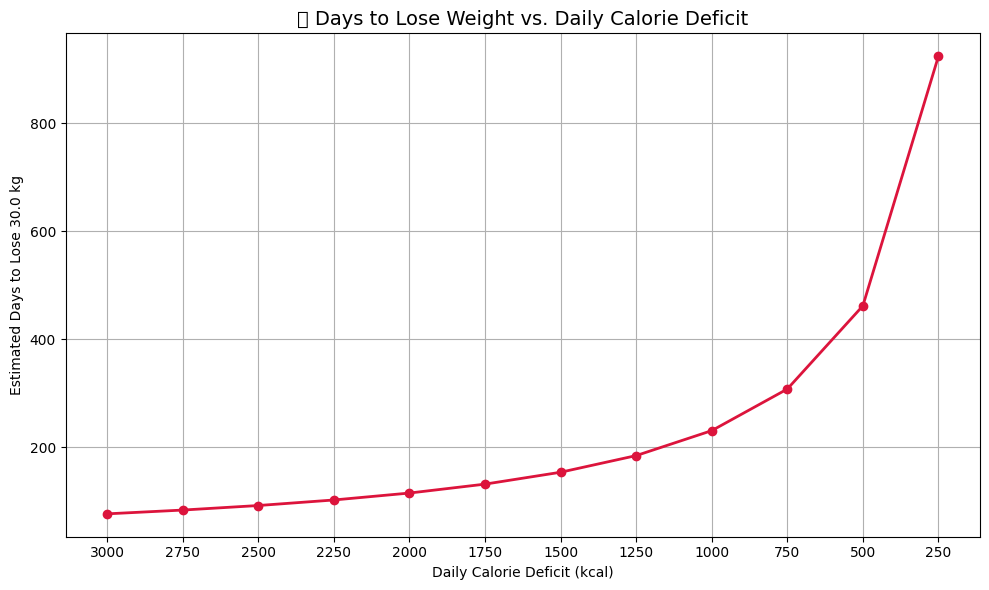

In [7]:
import matplotlib.pyplot as plt

# --- Constants ---
CALORIES_PER_KG = 7700  # 1 kg of fat = ~7700 kcal

# --- User Input ---
bmr = float(input("Enter your BMR (kcal/day): "))
weight_loss_goal_kg = float(input("How many kilograms would you like to lose? "))

# --- Deficit Range (customizable) ---
deficits = list(range(250, int(bmr) - 100, 250))  # Avoid exceeding BMR to stay safe
days_needed = []

# --- Compute Days to Goal for Each Deficit ---
for deficit in deficits:
    total_calories_needed = weight_loss_goal_kg * CALORIES_PER_KG
    estimated_days = total_calories_needed / deficit
    days_needed.append(estimated_days)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(deficits, days_needed, marker='o', color='crimson', linewidth=2)

plt.title("📉 Days to Lose Weight vs. Daily Calorie Deficit", fontsize=14)
plt.xlabel("Daily Calorie Deficit (kcal)")
plt.ylabel("Estimated Days to Lose {:.1f} kg".format(weight_loss_goal_kg))
plt.grid(True)
plt.xticks(deficits)
plt.gca().invert_xaxis()  # Higher deficit = fewer days (left to right)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np

def max_product_dynamic(grid, sequence_len):
    max_prod = 0
    rows, cols = grid.shape
    
    for i in range(rows):
        for j in range(cols):
            # Horizontal
            if j <= cols - sequence_len:
                prod = np.prod(grid[i, j:j+sequence_len])
                max_prod = max(max_prod, prod)
            # Vertical
            if i <= rows - sequence_len:
                prod = np.prod(grid[i:i+sequence_len, j])
                max_prod = max(max_prod, prod)
            # Diagonal right-down
            if i <= rows - sequence_len and j <= cols - sequence_len:
                prod = np.prod([grid[i+k][j+k] for k in range(sequence_len)])
                max_prod = max(max_prod, prod)
            # Diagonal left-down
            if i <= rows - sequence_len and j >= sequence_len - 1:
                prod = np.prod([grid[i+k][j-k] for k in range(sequence_len)])
                max_prod = max(max_prod, prod)
    return max_prod

# Example usage:
# grid = np.random.randint(1, 100, size=(6, 6))  # You can change size here
grid = np.array([[8, 2, 22, 97, 38, 15, 00, 40, 00, 75, 4, 5, 7, 78, 52, 12, 50, 77, 91, 8],
        [49, 49, 99, 40, 17, 81, 18, 57, 60, 87, 17, 40, 98, 43, 69, 48, 4, 56, 62, 00],
        [81, 49, 31, 73, 55, 79, 14, 29, 93, 71, 40, 67, 53, 88, 30, 3, 49, 13, 36, 65],
        [52, 70, 95, 23, 4, 60, 11, 42, 69, 24, 68, 56, 1, 32, 56, 71, 37, 2, 36, 91],
        [22, 31, 16, 71, 51, 67, 63, 89, 41, 92, 36, 54, 22, 40, 40, 28, 66, 33, 13, 80],
        [24, 47, 32, 60, 99, 3, 45, 2, 44, 75, 33, 53, 78, 36, 84, 20, 35, 17, 12, 50],
        [32, 98, 81, 28, 64, 23, 67, 10, 26, 38, 40, 67, 59, 54, 70, 66, 18, 38, 64, 70],
        [67, 26, 20, 68, 2, 62, 12, 20, 95, 63, 94, 39, 63, 8, 40, 91, 66, 49, 94, 21],
        [24, 55, 58, 5, 66, 73, 99, 26, 97, 17, 78, 78, 96, 83, 14, 88, 34, 89, 63, 72],
        [21, 36, 23, 9, 75, 00, 76, 44, 20, 45, 35, 14, 00, 61, 33, 97, 34, 31, 33, 95],
        [78, 17, 53, 28, 22, 75, 31, 67, 15, 94, 3, 80, 4, 62, 16, 14, 9, 53, 56, 92],
        [16, 39, 5, 42, 96, 35, 31, 47, 55, 58, 88, 24, 00, 17, 54, 24, 36, 29, 85, 57],
        [86, 56, 00, 48, 35, 71, 89, 7, 5, 44, 44, 37, 44, 60, 21, 58, 51, 54, 17, 58],
        [19, 80, 81, 68, 5, 94, 47, 69, 28, 73, 92, 13, 86, 52, 17, 77, 4, 89, 55, 40],
        [4, 52, 8, 83, 97, 35, 99, 16, 7, 97, 57, 32, 16, 26, 26, 79, 33, 27, 98, 66],
        [88, 36, 68, 87, 57, 62, 20, 72, 3, 46, 33, 67, 46, 55, 12, 32, 63, 93, 53, 69],
        [4, 42, 16, 73, 38, 25, 39, 11, 24, 94, 72, 18, 8, 46, 29, 32, 40, 62, 76, 36],
        [20, 69, 36, 41, 72, 30, 23, 88, 34, 62, 99, 69, 82, 67, 59, 85, 74, 4, 36, 16],
        [20, 73, 35, 29, 78, 31, 90, 1, 74, 31, 49, 71, 48, 86, 81, 16, 23, 57, 5, 54],
        [1, 70, 54, 71, 83, 51, 54, 69, 16, 92, 33, 48, 61, 43, 52, 1, 89, 19, 67, 48]])
sequence_length = 4
result = max_product_dynamic(grid, sequence_length)
print("Maximum product of", sequence_length, "adjacent numbers is:", result)


Maximum product of 4 adjacent numbers is: 70600674


In [5]:
def count_divisors(n):
    count = 0
    sqrt_n = int(n ** 0.5)
    for i in range(1, sqrt_n + 1):
        if n % i == 0:
            count += 2 if i != n // i else 1
    return count

def find_triangle_with_divisors(limit):
    n = 1
    triangle = 1
    while True:
        triangle = n * (n + 1) // 2
        if count_divisors(triangle) > limit:
            return triangle
        n += 1

# Find the first triangle number with over 500 divisors
result = find_triangle_with_divisors(500)
print("Triangle number with over 500 divisors:", result)

Triangle number with over 500 divisors: 76576500


In [16]:
n = 837799
while n != 1:
    if n%2 == 0:
        print(f"{n}")
        n = n / 2
    else:
        print(f"{n}")
        n = 3 * n + 1
print(n)

837799
2513398
1256699.0
3770098.0
1885049.0
5655148.0
2827574.0
1413787.0
4241362.0
2120681.0
6362044.0
3181022.0
1590511.0
4771534.0
2385767.0
7157302.0
3578651.0
10735954.0
5367977.0
16103932.0
8051966.0
4025983.0
12077950.0
6038975.0
18116926.0
9058463.0
27175390.0
13587695.0
40763086.0
20381543.0
61144630.0
30572315.0
91716946.0
45858473.0
137575420.0
68787710.0
34393855.0
103181566.0
51590783.0
154772350.0
77386175.0
232158526.0
116079263.0
348237790.0
174118895.0
522356686.0
261178343.0
783535030.0
391767515.0
1175302546.0
587651273.0
1762953820.0
881476910.0
440738455.0
1322215366.0
661107683.0
1983323050.0
991661525.0
2974984576.0
1487492288.0
743746144.0
371873072.0
185936536.0
92968268.0
46484134.0
23242067.0
69726202.0
34863101.0
104589304.0
52294652.0
26147326.0
13073663.0
39220990.0
19610495.0
58831486.0
29415743.0
88247230.0
44123615.0
132370846.0
66185423.0
198556270.0
99278135.0
297834406.0
148917203.0
446751610.0
223375805.0
670127416.0
335063708.0
167531854.0
8376592

In [17]:
def number_to_words(n):
    # Mappings for basic units
    ones = ["", "one", "two", "three", "four", "five", "six", "seven",
            "eight", "nine", "ten", "eleven", "twelve", "thirteen",
            "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen"]
    tens = ["", "", "twenty", "thirty", "forty", "fifty",
            "sixty", "seventy", "eighty", "ninety"]
    
    if 1 <= n < 20:
        return ones[n]
    elif 20 <= n < 100:
        return tens[n//10] + ones[n%10]
    elif 100 <= n < 1000:
        remainder = n % 100
        if remainder == 0:
            return ones[n // 100] + "hundred"
        else:
            return ones[n // 100] + "hundredand" + number_to_words(remainder)
    elif n == 1000:
        return "onethousand"
    else:
        return ""
    
def total_letters_used(limit):
    total = 0
    for i in range(1, limit + 1):
        word = number_to_words(i)
        total += len(word)
    return total

print(total_letters_used(1000))

21124
